Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       368
           1       0.91      0.67      0.77        43

    accuracy                           0.96       411
   macro avg       0.93      0.83      0.88       411
weighted avg       0.96      0.96      0.96       411


Confusion Matrix:
[[365   3]
 [ 14  29]]


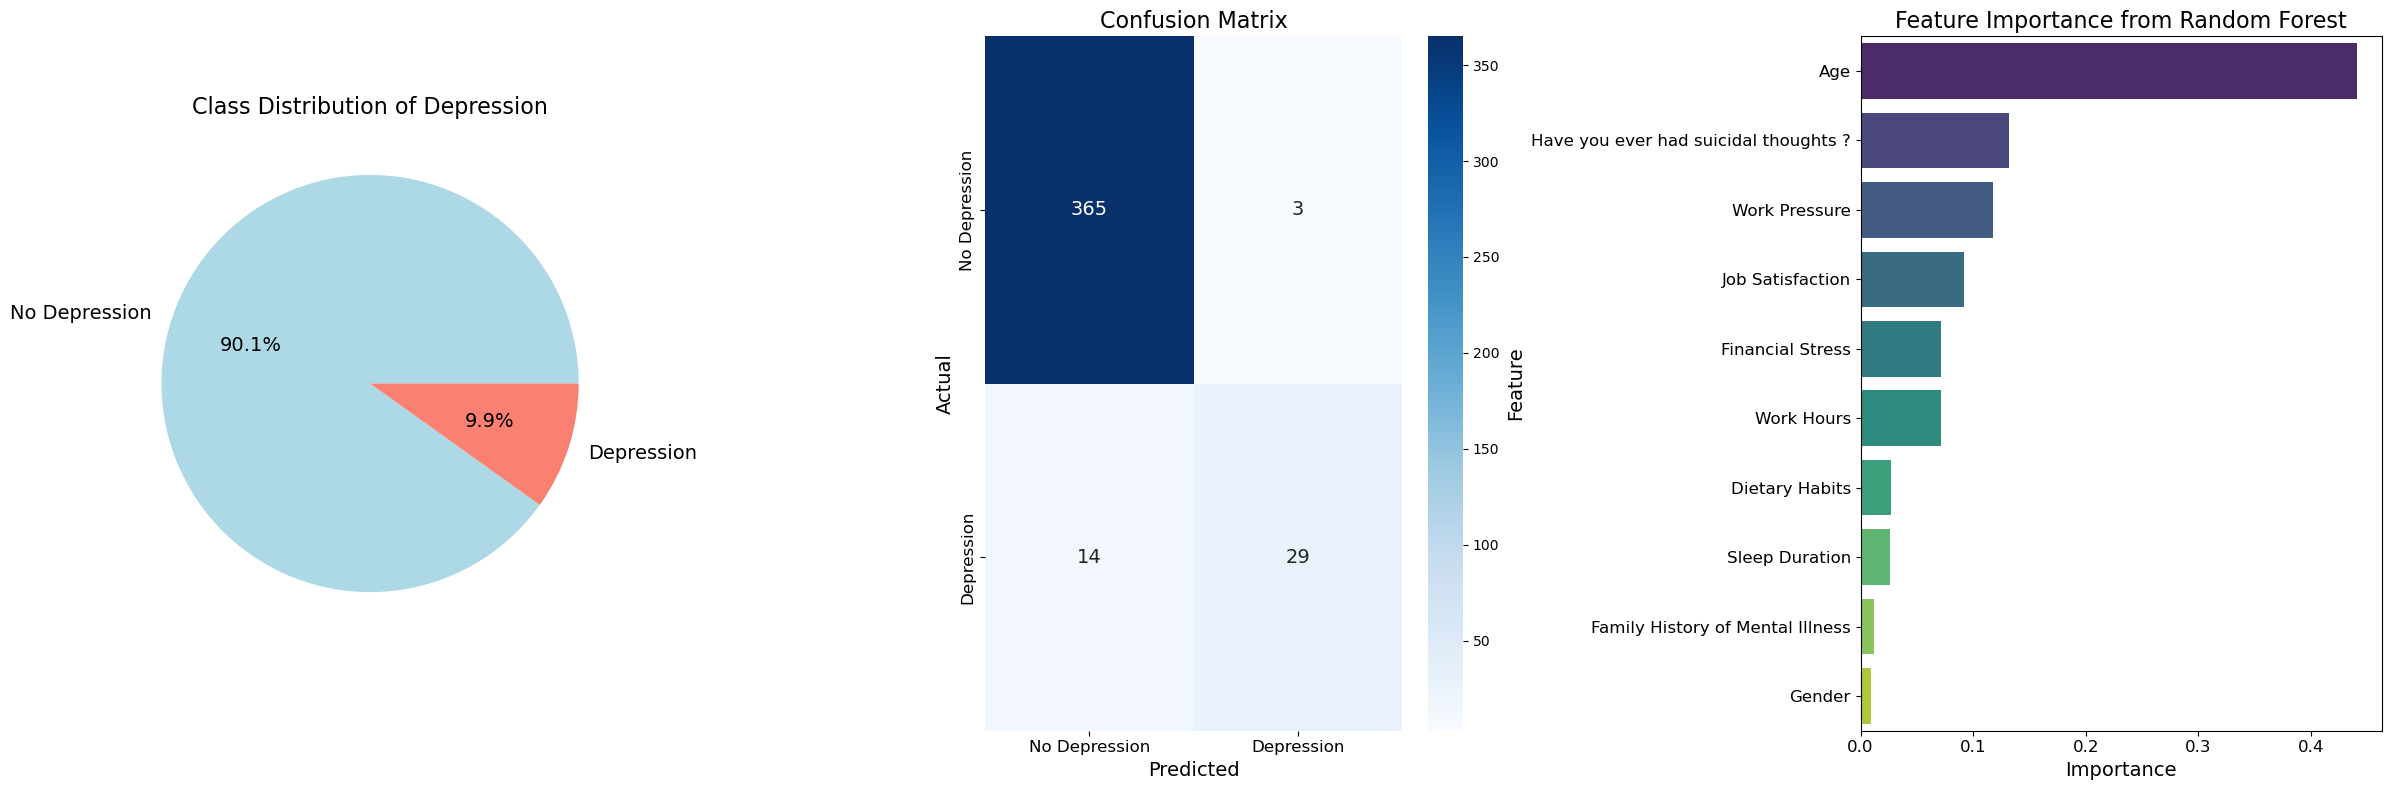


Feature Importance:
                                 Feature  Importance
1                                    Age    0.441017
6  Have you ever had suicidal thoughts ?    0.132111
2                          Work Pressure    0.117484
3                       Job Satisfaction    0.092242
8                       Financial Stress    0.071741
7                             Work Hours    0.071208
5                         Dietary Habits    0.027074
4                         Sleep Duration    0.025902
9       Family History of Mental Illness    0.012104
0                                 Gender    0.009117


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Ensure plots display in Jupyter (if applicable)
%matplotlib inline

# Load dataset
data = pd.read_excel(r"C:\Users\mompa\Documents\Cleaned Depression Professional Dataset.xlsx")

# Preprocess: Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 
                   'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Define features (X) and target (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest with class weighting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Create subplots for all visualizations with larger size
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# 1. Class Distribution Pie Chart
data['Depression'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', labels=['No Depression', 'Depression'], 
                                          colors=['lightblue', 'salmon'], textprops={'fontsize': 14})
axes[0].set_title('Class Distribution of Depression', fontsize=16)
axes[0].set_ylabel('')

# 2. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], 
            yticklabels=['No Depression', 'Depression'], ax=axes[1], annot_kws={'size': 14})
axes[1].set_title('Confusion Matrix', fontsize=16)
axes[1].set_xlabel('Predicted', fontsize=14)
axes[1].set_ylabel('Actual', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

# 3. Feature Importance Bar Plot
feature_importance = pd.DataFrame({
    'Feature': data.drop('Depression', axis=1).columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis', ax=axes[2])
axes[2].set_title('Feature Importance from Random Forest', fontsize=16)
axes[2].set_xlabel('Importance', fontsize=14)
axes[2].set_ylabel('Feature', fontsize=14)
axes[2].tick_params(axis='both', labelsize=12)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

# Feature Importance Table
print("\nFeature Importance:")
print(feature_importance)